In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error,roc_curve, r2_score


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('adult.csv')
print("Dataset imported successfully")
#View summary of dataframe
df.info()

Dataset imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df_shape = df.shape
print(df_shape)

(32561, 15)


In [51]:
df_columns = df.columns
print(df_columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [52]:
# Print first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [53]:
df.replace('?', np.nan, inplace=True)

# Fill missing values in 'workclass' column with mode
mode_workclass = df['workclass'].mode()[0]
df['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = df['occupation'].mode()[0]
df['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = df['native.country'].mode()[0]
df['native.country'].fillna(mode_native_country, inplace=True)

In [54]:
# Check for missing values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [55]:
# Convert columns with numerical data to numeric data type
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)

In [56]:
# Drop unnecessary columns
df.drop(['fnlwgt'], axis=1, inplace=True)

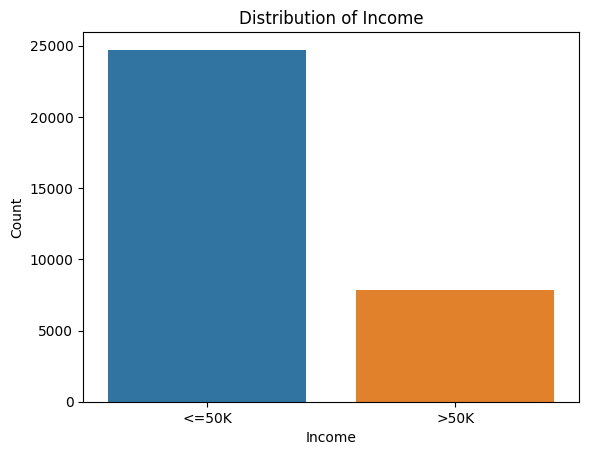

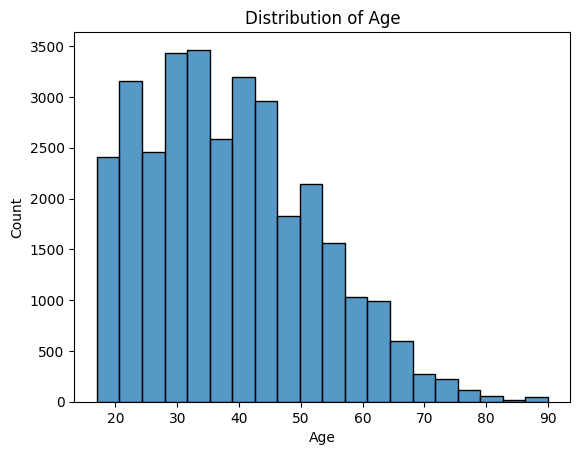

In [57]:
# Visualize the distribution of income
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of age
sns.histplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

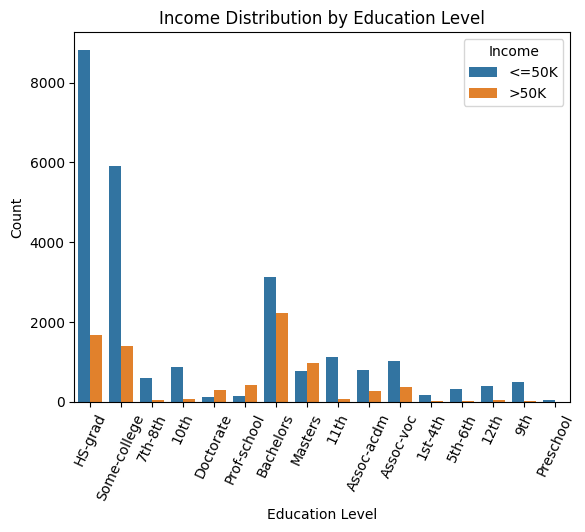

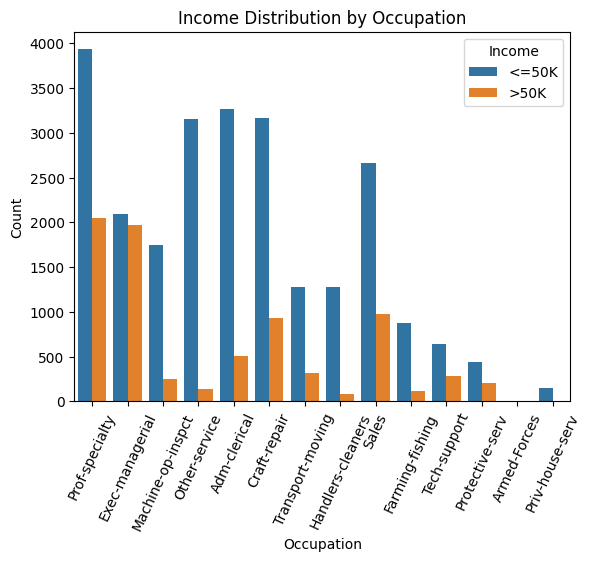

In [58]:
# Visualize the income distribution by education level
sns.countplot(x='education', hue='income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.legend(title='Income', loc='upper right')
plt.show()

# Visualize the income distribution by occupation
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.legend(title='Income', loc='upper right')
plt.show()

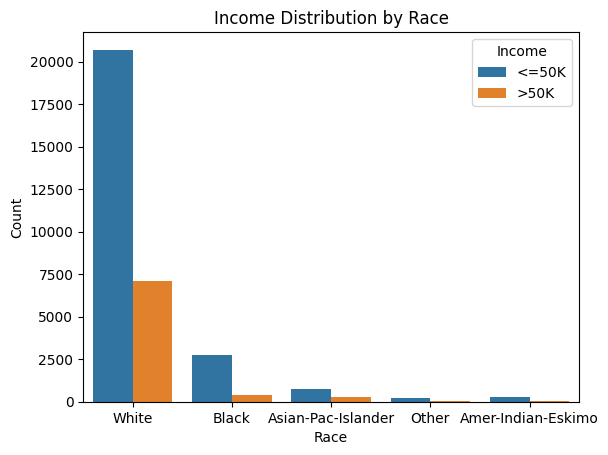

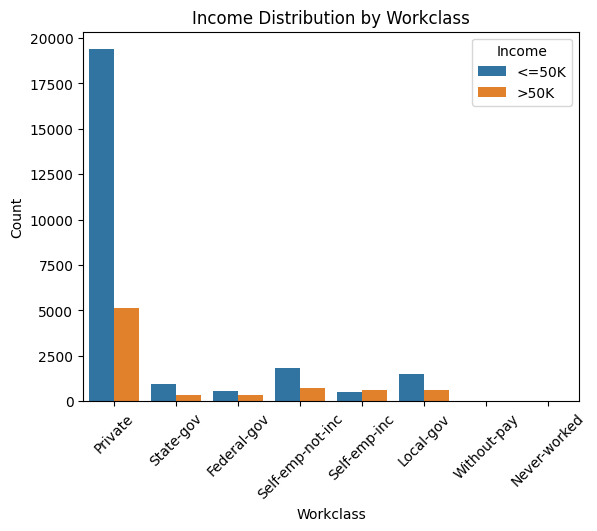

In [59]:
# Visualize the income distribution by race
sns.countplot(x='race', hue='income', data=df)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by workclass
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

In [60]:
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [61]:
#Split the dataset into training and testing sets
X = df.drop(['income'], axis=1)

y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [62]:
#Converting categorical variables to numerical variables using LabelEncoder()
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [63]:
X_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,6,9,13,2,3,5,4,0,0,0,20,38
25206,39,1,11,9,2,6,0,4,1,0,0,38,38
23491,42,3,15,10,4,3,1,4,0,0,0,40,38
12367,27,1,11,9,4,4,3,4,1,0,0,40,38
7054,38,0,12,14,2,3,0,4,1,0,0,40,38


In [64]:
##Model Training
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8045


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7410
           1       0.69      0.34      0.46      2359

    accuracy                           0.80      9769
   macro avg       0.76      0.65      0.67      9769
weighted avg       0.79      0.80      0.78      9769



In [66]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8044835704780428
Precision: 0.6940363007778738
Recall: 0.3403984739296312
F1 Score: 0.45676905574516496
ROC AUC Score: 0.6463125972887022


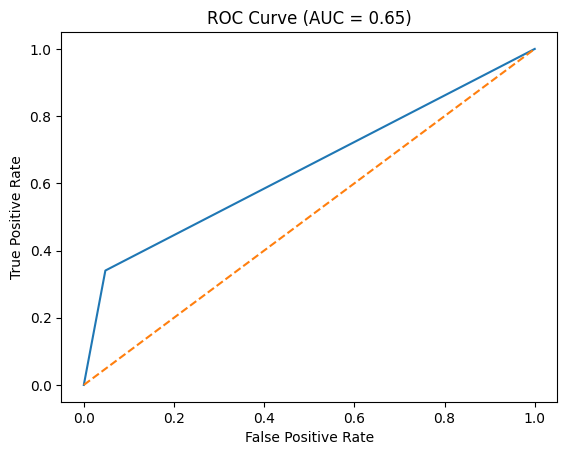

In [67]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

In [68]:
# initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the model on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8164602313440475


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7410
           1       0.62      0.60      0.61      2359

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.75      9769
weighted avg       0.81      0.82      0.82      9769



In [70]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8164602313440475
Precision: 0.6243409490333919
Recall: 0.6023738872403561
F1 Score: 0.6131607335490831
ROC AUC Score: 0.7434946359278704


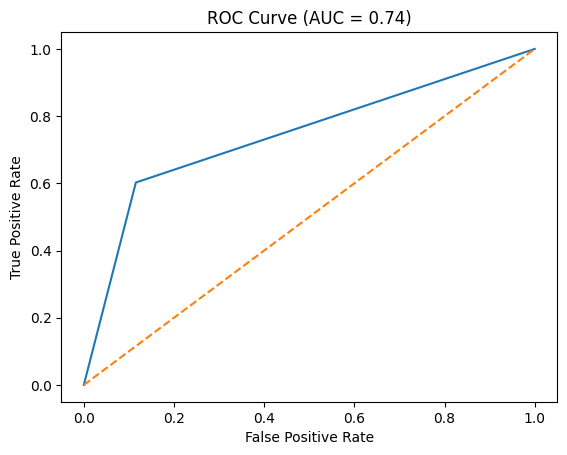

In [71]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

In [72]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Knn accuracy:', accuracy)

Knn accuracy: 0.8380591667519706


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7410
           1       0.68      0.62      0.65      2359

    accuracy                           0.84      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.83      0.84      0.84      9769



In [74]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8380591667519706
Precision: 0.6809501630181649
Recall: 0.6197541331072488
F1 Score: 0.6489125610297382
ROC AUC Score: 0.7636557440165123


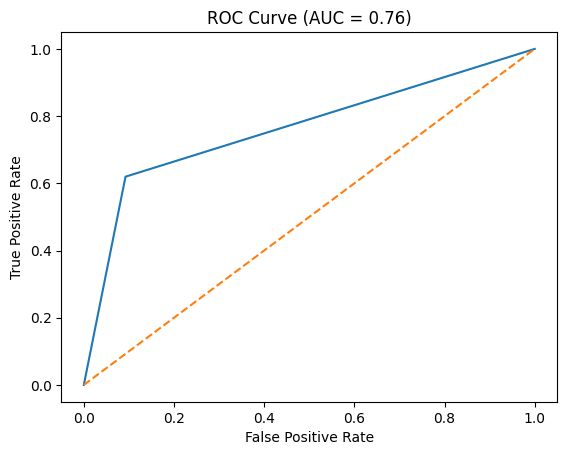

In [75]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

In [76]:
#Support Vector Machine
from sklearn.svm import SVC
# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Support Vector Machine accuracy:', accuracy)

Support Vector Machine accuracy: 0.8031528303818201


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7410
           1       0.75      0.28      0.41      2359

    accuracy                           0.80      9769
   macro avg       0.78      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



In [78]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8031528303818201
Precision: 0.7477272727272727
Recall: 0.2789317507418398
F1 Score: 0.40629824019759186
ROC AUC Score: 0.6244861182858996


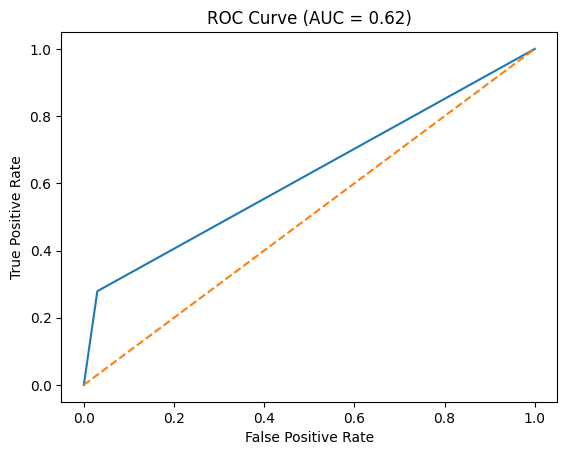

In [79]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()


In [80]:
#AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100)                     
# Train the model on the training set
ada.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ada.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('AdaBoost accuracy:', accuracy)


AdaBoost accuracy: 0.8609888422561163


In [81]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8609888422561163
Precision: 0.7680771290840921
Recall: 0.6078846969054684
F1 Score: 0.6786559394226218
ROC AUC Score: 0.774725074498618


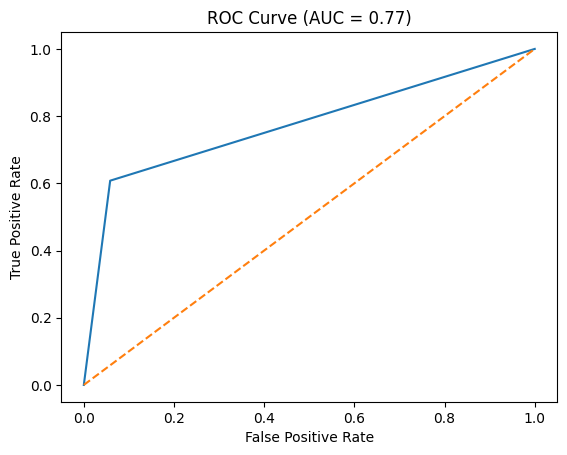

In [82]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

In [83]:
# Create a Random Forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest accuracy:', accuracy)

Random Forest accuracy: 0.8474767120483161


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7410
           1       0.71      0.61      0.66      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [85]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8474767120483161
Precision: 0.7145679012345679
Recall: 0.6133955065705807
F1 Score: 0.6601277372262773
ROC AUC Score: 0.767696403757625


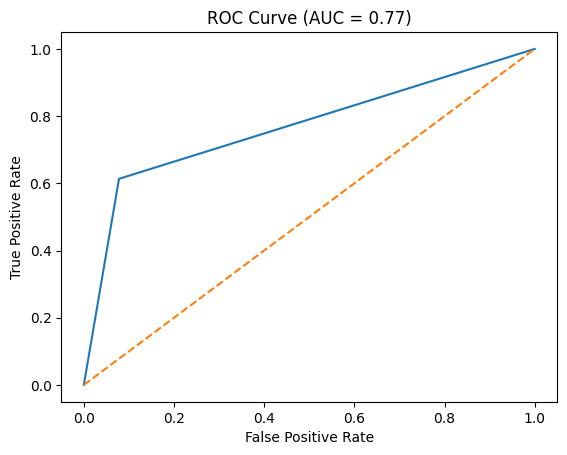

In [86]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()


In [87]:
ann_tanh = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 2), random_state=1, warm_start=True)
# Train the model on the training set
ann_tanh.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ann_tanh.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('ANN accuracy:', accuracy)

ANN accuracy: 0.8063261336881974


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7410
           1       0.61      0.57      0.59      2359

    accuracy                           0.81      9769
   macro avg       0.74      0.73      0.73      9769
weighted avg       0.80      0.81      0.80      9769



In [89]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8063261336881974
Precision: 0.605227579990987
Recall: 0.5693090292496821
F1 Score: 0.5867190913062473
ROC AUC Score: 0.7255452028839504


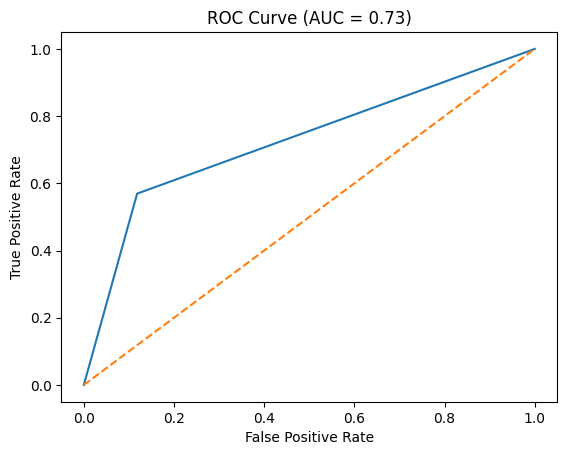

In [90]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

In [91]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes accuracy:', accuracy)

Naive Bayes accuracy: 0.80202681953117


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7410
           1       0.69      0.33      0.45      2359

    accuracy                           0.80      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.79      0.80      0.78      9769



In [93]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.80202681953117
Precision: 0.6852659110723627
Recall: 0.3331920305214074
F1 Score: 0.448374215630348
ROC AUC Score: 0.6422370409017293


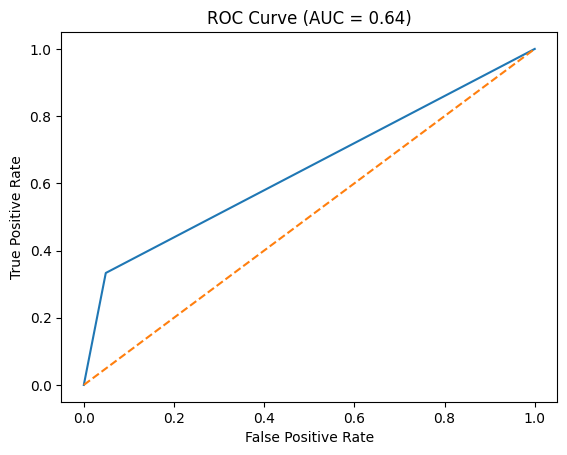

In [94]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()